<a href="https://colab.research.google.com/github/MehrdadJalali-AI/InverseLinkPredcition/blob/main/CompareMLMethods_Sparcified_0_98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/InverseLinkPredcition')

Mounted at /content/drive


In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 17.5 MB/s eta 0:00:00


Unique node labels: 2112
Filtered summary data:
 2112


<ipython-input-3-bdd4d2434d75>:279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_filtered['PLD_category'] = pd.cut(


Epoch 1/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3163 - loss: 6.0858
Epoch 1: val_loss improved from inf to 2.74295, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.3176 - loss: 6.0564 - val_accuracy: 0.6361 - val_loss: 2.7429
Epoch 2/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4970 - loss: 2.5097
Epoch 2: val_loss improved from 2.74295 to 1.72149, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4971 - loss: 2.5045 - val_accuracy: 0.6982 - val_loss: 1.7215
Epoch 3/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6106 - loss: 1.7177
Epoch 3: val_loss improved from 1.72149 to 1.33838, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6104 - loss: 1.7162 - val_accuracy: 0.7574 - val_loss: 1.3384
Epoch 4/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5982 - loss: 1.4504
Epoch 4: val_loss improved from 1.33838 to 1.13

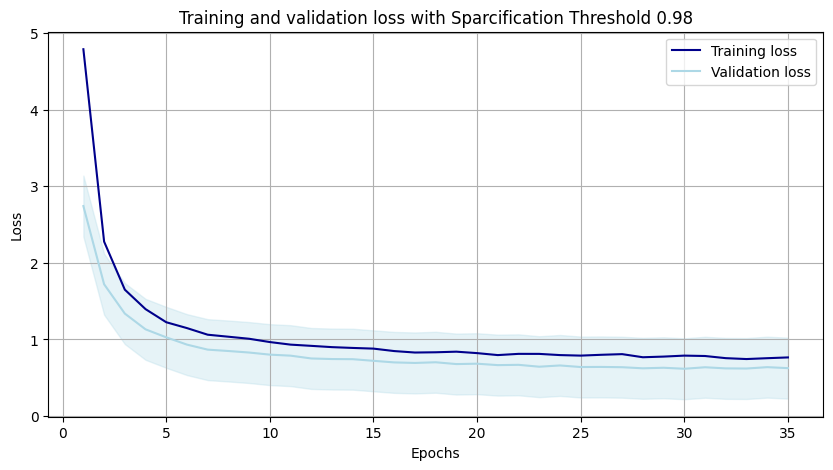

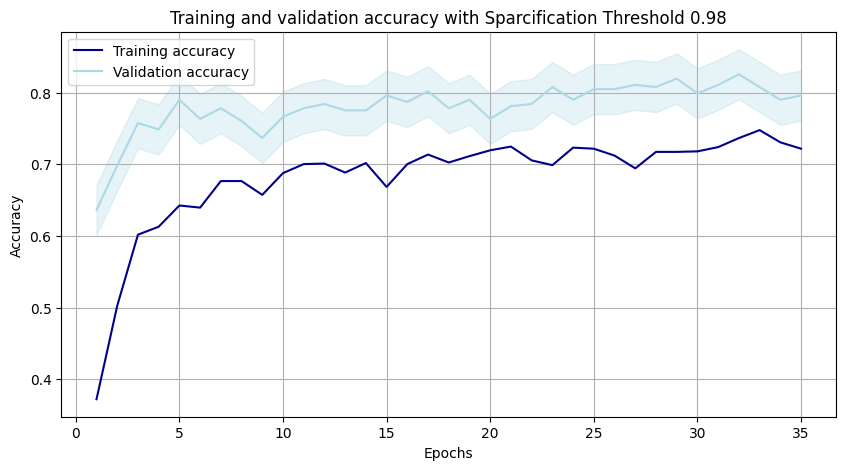

Test Accuracy: 0.7517730593681335
Test Accuracy of the best model: 0.7517730593681335
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


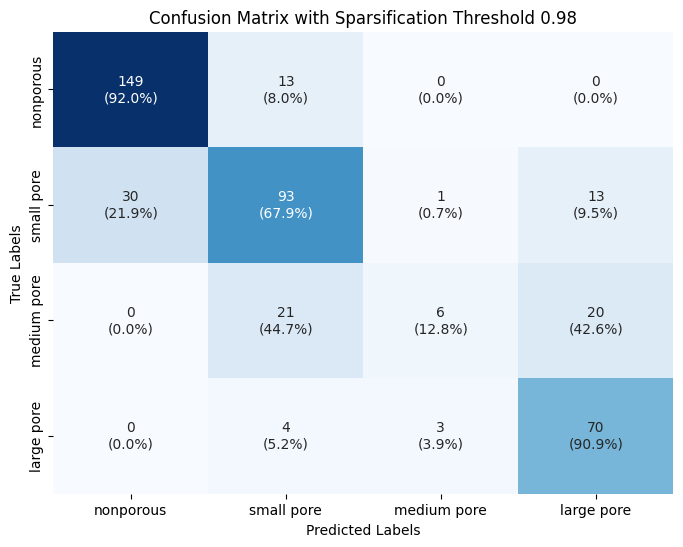

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2735 - loss: 2.7791 - val_accuracy: 0.5414 - val_loss: 1.7142
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4699 - loss: 1.6781 - val_accuracy: 0.5888 - val_loss: 1.3693
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5907 - loss: 1.3548 - val_accuracy: 0.6627 - val_loss: 1.1787
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6429 - loss: 1.1702 - val_accuracy: 0.6568 - val_loss: 1.0862
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6454 - loss: 1.1070 - val_accuracy: 0.6805 - val_loss: 0.9944
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6879 - loss: 1.0008 - val_accuracy: 0.7485 - val_loss: 0.9521
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6695 - loss: 0.9736 - val_accuracy: 0.7456 - val_loss: 0.9052
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6963 - loss: 0.9360 - val_accuracy: 0.6864 - val_los

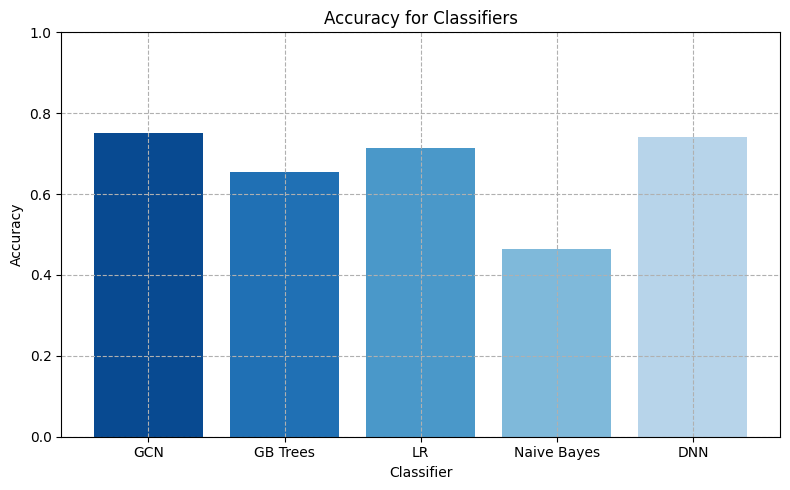

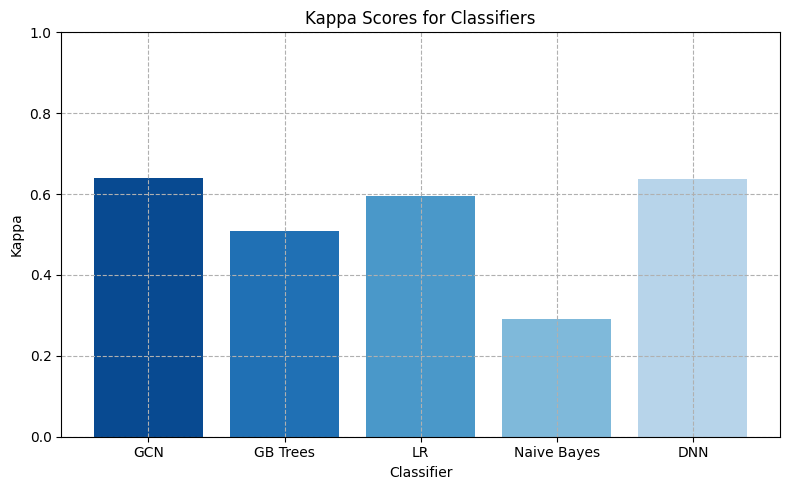

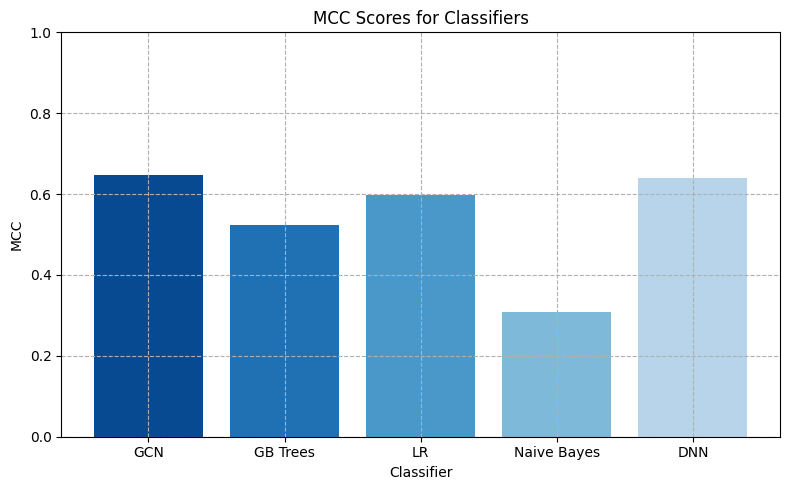

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import load_model
import warnings
from rdkit import RDLogger
from tensorflow.keras import models, layers, regularizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import time

threshold=0.98

# np.random.seed(56)
# random.seed(56)
# tf.random.set_seed

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Additionally, suppress RDKit warnings globally
RDLogger.DisableLog('rdApp.*')

def generate_fingerprint(smiles):
    """Generates a molecular fingerprint given a SMILES string."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((1024,), dtype=float)  # Return an array of zeros if molecule can't be parsed
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024), dtype=float)
    except Exception as e:
        print(f"SMILES Parse Error: {e}")
        return np.zeros((1024,), dtype=float)  # Return an array of zeros in case of an error



def plot_confusion_matrix(y_true, y_pred, classes):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate percentage accuracy for each element in the confusion matrix
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Combine counts and percentages for display
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_percentage[i, j]
            annot[i, j] = f'{c}\n({p:.1f}%)'  # Count and percentage

    # Plot the confusion matrix with annotations
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(f'Confusion Matrix with Sparsification Threshold {threshold}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Extract loss and accuracy from history
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)
    accuracy = history.history['accuracy']
    val_accuracy = history.history.get('val_accuracy', None)
    epochs = range(1, len(loss) + 1)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'darkblue', label='Training loss')  # Change color to dark blue
    if val_loss:
        plt.plot(epochs, val_loss, 'lightblue', label='Validation loss')  # Change color to light blue
        plt.fill_between(epochs, np.array(val_loss) - np.std(val_loss), np.array(val_loss) + np.std(val_loss), color='lightblue', alpha=0.3)  # Fill between mean - std and mean + std
    plt.title(f'Training and validation loss with Sparcification Threshold {threshold}')
    # plt.title('Training and Validation Loss on the Original Dataset')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, 'darkblue', label='Training accuracy')  # Change color to dark blue
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'lightblue', label='Validation accuracy')  # Change color to light blue
        plt.fill_between(epochs, np.array(val_accuracy) - np.std(val_accuracy), np.array(val_accuracy) + np.std(val_accuracy), color='lightblue', alpha=0.3)  # Fill between mean - std and mean + std
    plt.title(f'Training and validation accuracy with Sparcification Threshold {threshold}')
    # plt.title('Training and validation accuracy on the Original Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

def label_encode_metal_names(metal_names):
    """Encodes metal names as integers."""
    metal_dict = {metal: idx for idx, metal in enumerate(np.unique(metal_names))}
    return np.array([metal_dict[metal] for metal in metal_names])


# Function to train and evaluate different classifiers
def train_and_evaluate_classifier(classifier, train_features, train_labels, test_features, test_labels):
    classifier.fit(train_features, train_labels)
    accuracy = classifier.score(test_features, test_labels)
    return accuracy




def preprocess_graph(graph, features):
    # Determine the dimensionality of the feature vectors
    feature_dimension = features.shape[1]

    # Convert the graph to an adjacency matrix
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    # Initialize an empty list to store feature vectors
    feature_vectors = []

    # Create a mapping from node labels to integer indices
    node_to_index = {node: index for index, node in enumerate(graph.nodes())}

    # Iterate over nodes in the graph
    for node in graph.nodes():
        # Get the integer index corresponding to the node label
        node_index = node_to_index[node]
        # Check if the node index is valid
        if node_index < len(features):
            # Append the feature vector corresponding to the node index
            feature_vectors.append(features[node_index])
        else:
            # If the node index is out of range, assign a default feature vector
            feature_vectors.append(np.zeros((feature_dimension,)))

    # Convert the list of feature vectors to a numpy array
    feature_matrix = np.array(feature_vectors)

    return adjacency_matrix, feature_matrix


def build_gcn_model(input_shape_feature, input_shape_adjacency, num_classes):
    # Define input layers
    x_inp_feature = Input(shape=(input_shape_feature,))
    x_inp_adjacency = Input(shape=(input_shape_adjacency,))

    # Feature processing with multiple layers
    x_feature = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_feature)
    x_feature = Dropout(0.5)(x_feature)
    x_feature = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_feature)
    x_feature = Dropout(0.3)(x_feature)

    # Adjacency processing with multiple layers
    x_adjacency = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_adjacency)
    x_adjacency = Dropout(0.5)(x_adjacency)
    x_adjacency = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_adjacency)
    x_adjacency = Dropout(0.3)(x_adjacency)

    # Concatenate feature and adjacency outputs
    x = concatenate([x_feature, x_adjacency])

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)

    # Using a smaller learning rate
    optimizer = Adam(learning_rate=0.0009)

    # Compile model
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

    return model



def build_feedforward_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def train_gcn_model(model, adjacency_matrix, feature_matrix, labels, epochs, batch_size):
    if model is not None and adjacency_matrix is not None and feature_matrix is not None and labels is not None:
        # Early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # ModelCheckpoint to save the best model
        model_checkpoint = ModelCheckpoint('best_gcn_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

        start_time = time.time()
        # Train the model
        history = model.fit([feature_matrix, adjacency_matrix], labels,
                            epochs=epochs, batch_size=batch_size,
                            validation_split=0.2, callbacks=[early_stopping, model_checkpoint])
        end_time = time.time()

        # Calculate total training time
        total_training_time = end_time - start_time
        print(f"Total training time: {total_training_time:.2f} seconds")

        return history
    else:
        print("Error: One or more input arguments to train_gcn_model is None.")


from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    edges_list_filename = 'sparsified_graph_edges_0.98.csv'
    # edges_list_filename ='edges_list_0.8_Full.csv'
    summary_data_filename = '1M1L3D_summary.csv'

    # Load data
    edges_list = pd.read_csv(edges_list_filename, header=None, names=['source', 'target', 'weight'], delimiter=' ')
    summary_data = pd.read_csv(summary_data_filename)

    node_labels_source = edges_list['source'].astype(str).unique()
    node_labels_target = edges_list['target'].astype(str).unique()
    node_labels = np.unique(np.concatenate((node_labels_source, node_labels_target)))
    node_labels = list(set(node_labels))

    print("Unique node labels:", len(node_labels))

    summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
    print("Filtered summary data:\n", len(summary_data_filtered))

    if not summary_data_filtered.empty:
        linker_smiles = summary_data_filtered['linker SMILES']
        if not linker_smiles.empty:
            # Generate features

            linker_features = np.stack(linker_smiles.dropna().apply(generate_fingerprint).values)
            metal_names = summary_data_filtered['metal']
            metal_features = label_encode_metal_names(metal_names).reshape(-1, 1)

            other_features = summary_data_filtered[['Largest Cavity Diameter', 'Largest Free Sphere']].values.astype('float32')
            features = np.concatenate((linker_features, metal_features, other_features), axis=1)

            # Generate labels
            summary_data_filtered['PLD_category'] = pd.cut(
                summary_data_filtered['Pore Limiting Diameter'],
                bins=[-np.inf, 2.4, 4.4, 5.9, np.inf],
                labels=['nonporous', 'small pore', 'medium pore', 'large pore']
            )
            labels = pd.get_dummies(summary_data_filtered['PLD_category']).values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=56)

            # Load the sparsified graph
            graph = nx.read_weighted_edgelist(edges_list_filename)

            # Preprocess the graph data
            adjacency_matrix, feature_matrix = preprocess_graph(graph, features)

            # Split the adjacency and feature matrices accordingly
            adj_train, adj_test, feat_train, feat_test = train_test_split(adjacency_matrix, feature_matrix, test_size=0.2, random_state=56)

            # Provide the number of classes
            num_classes = labels.shape[1]

            # Build the GCN model
            gcn_model = build_gcn_model(feat_train.shape[1], adj_train.shape[1], num_classes)

            # Train the GCN model
            history = train_gcn_model(gcn_model, adj_train, feat_train, y_train, epochs=40, batch_size=32)
            plot_loss_accuracy(history)
            threshold=0.98
            # Save the trained GCN model
            gcn_model.save("gcn_model_0.98.h5")
            # gcn_model.save("gcn_model_original.h5")
            # Save the adjacency matrix
            np.save("adjacency_matrix_0.98.npy", adjacency_matrix)

            # Evaluate the model on the test set
            test_loss, test_accuracy = gcn_model.evaluate([feat_test, adj_test], y_test, verbose=0)
            print(f'Test Accuracy: {test_accuracy}')


            # Load the best model saved by ModelCheckpoint
            best_gcn_model = load_model('best_gcn_model.keras')

            # Now evaluate the best saved model on the test data
            test_loss, test_accuracy = best_gcn_model.evaluate([feat_test, adj_test], y_test, verbose=0)
            print(f'Test Accuracy of the best model: {test_accuracy}')

            # Generate predictions on the test set
            y_pred = np.argmax(gcn_model.predict([feat_test, adj_test]), axis=1)
            y_true = np.argmax(y_test, axis=1)

            # Define class labels
            classes = ['nonporous', 'small pore', 'medium pore', 'large pore']
              # Plot loss and accuracy

            # Plot confusion matrix for the test set
            plot_confusion_matrix(y_true, y_pred, classes)


            # Train and evaluate GCN
            y_pred_gcn = np.argmax(gcn_model.predict([feat_test, adj_test]), axis=1)
            y_true_gcn = np.argmax(y_test, axis=1)
            gcn_accuracy = accuracy_score(y_true_gcn, y_pred_gcn)
            gcn_kappa = cohen_kappa_score(y_true_gcn, y_pred_gcn)
            gcn_mcc = matthews_corrcoef(y_true_gcn, y_pred_gcn)

            train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
            # Train and evaluate Gradient Boosted Trees
            gbt_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=2)
            gbt_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            gbt_pred = gbt_classifier.predict(test_features)
            gbt_accuracy = accuracy_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), gbt_pred)

            from sklearn.linear_model import LogisticRegression
            from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef

            # Train and evaluate Logistic Regression
            logreg_classifier = LogisticRegression(max_iter=200)  # You can adjust max_iter if necessary
            logreg_classifier.fit(train_features, np.argmax(train_labels, axis=1))  # Train the model

            logreg_pred = logreg_classifier.predict(test_features)  # Make predictions on the test set

            # Calculate evaluation metrics
            logreg_accuracy = accuracy_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), logreg_pred)


            # Train and evaluate Naive Bayes
            nb_classifier = GaussianNB()
            nb_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            nb_pred = nb_classifier.predict(test_features)
            nb_accuracy = accuracy_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), nb_pred)


            feedforward_model = build_feedforward_model(train_features.shape[1], train_labels.shape[1])
            feedforward_model.fit(train_features, train_labels, epochs=20, batch_size=32, validation_split=0.2)
            # Evaluate the model on the test set
            feedforward_loss, feedforward_accuracy = feedforward_model.evaluate(test_features, test_labels)

            # Convert one-hot predictions and labels to class indices
            feedforward_predictions = np.argmax(feedforward_model.predict(test_features), axis=1)
            true_labels = np.argmax(test_labels, axis=1)

            # Calculate Kappa and MCC for DNN
            dnn_kappa = cohen_kappa_score(true_labels, feedforward_predictions)
            dnn_mcc = matthews_corrcoef(true_labels, feedforward_predictions)




            # Define your classifiers and evaluation metrics
            classifiers = ['GCN', 'GB Trees', 'LR', 'Naive Bayes', 'DNN']
            accuracies = [gcn_accuracy, gbt_accuracy, logreg_accuracy, nb_accuracy, feedforward_accuracy]
            kappa_scores = [gcn_kappa, gbt_kappa, logreg_kappa, nb_kappa, dnn_kappa]
            mcc_scores = [gcn_mcc, gbt_mcc, logreg_mcc, nb_mcc, dnn_mcc]

            # Print evaluation metrics
            print("Classifier Evaluation Metrics:")
            for clf, acc, kappa, mcc in zip(classifiers, accuracies, kappa_scores, mcc_scores):
                print(f"{clf}: Accuracy={acc:.3f}, Kappa={kappa:.3f}, MCC={mcc:.3f}")

            # Plot all metrics in the same style
            colors = plt.cm.Blues(np.linspace(0.9, 0.3, len(classifiers)))

            # Plot accuracy
            plt.figure(figsize=(8, 5))
            plt.bar(classifiers, accuracies, color=colors)
            plt.title('Accuracy for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('Accuracy')
            plt.ylim(0, 1)  # Start from 0, no negative values
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()

            # Plot kappa scores
            plt.figure(figsize=(8, 5))
            plt.bar(classifiers, kappa_scores, color=colors)
            plt.title('Kappa Scores for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('Kappa')
            plt.ylim(0, 1)  # Start from 0
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()

            # Plot MCC scores
            plt.figure(figsize=(8, 5))
            plt.bar(classifiers, mcc_scores, color=colors)
            plt.title('MCC Scores for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('MCC')
            plt.ylim(0, 1)  # Start from 0
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()




        else:
            print("Error: linker_smiles column is empty.")
    else:
        print("Error: summary_data_filtered DataFrame is empty.")

Unique node labels: 2112
Filtered summary data:
 2112


<ipython-input-5-f88f121eb929>:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_filtered['PLD_category'] = pd.cut(


Epoch 1/40
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3091 - loss: 6.2953
Epoch 1: val_loss improved from inf to 2.79887, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.3124 - loss: 6.2316 - val_accuracy: 0.6272 - val_loss: 2.7989
Epoch 2/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5076 - loss: 2.5642
Epoch 2: val_loss improved from 2.79887 to 1.73651, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5076 - loss: 2.5586 - val_accuracy: 0.6953 - val_loss: 1.7365
Epoch 3/40
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5582 - loss: 1.7812
Epoch 3: val_loss improved from 1.73651 to 1.33117, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5601 - loss: 1.7723 - val_accuracy: 0.7337 - val_loss: 1.3312
Epoch 4/40
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6216 - loss: 1.4418
Epoch 4: val_loss improved from 1.33117 to 1.162

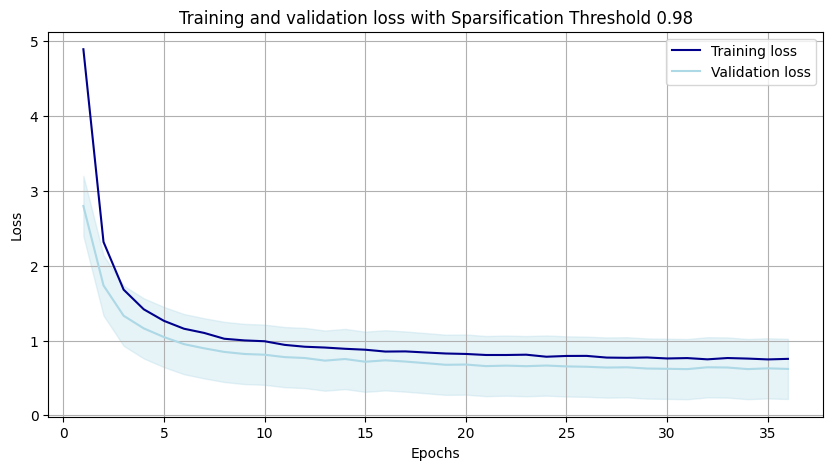

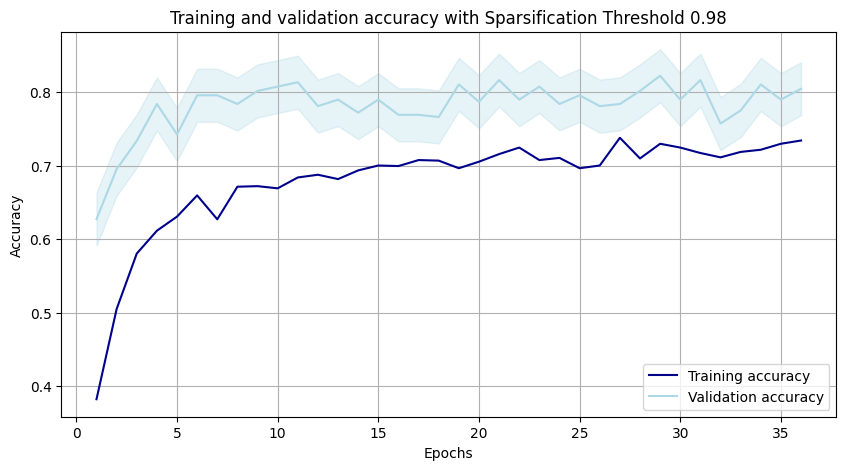

GCN Test Accuracy: 0.7635933756828308
GCN Test Accuracy of the best model: 0.7635933756828308
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


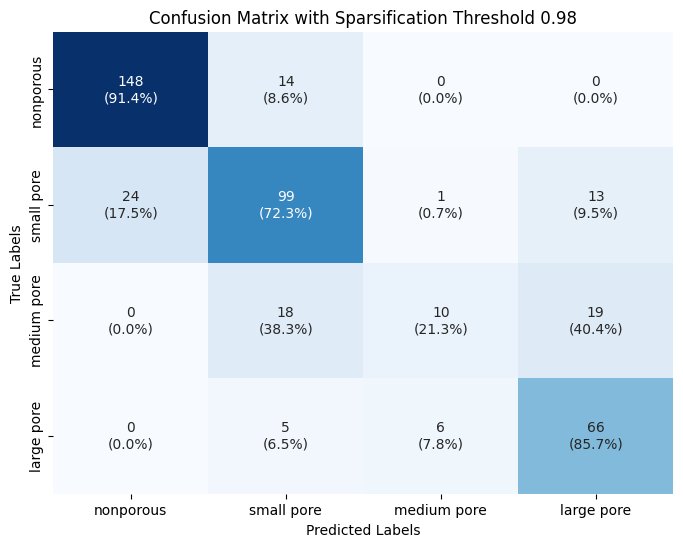

Epoch 1/40
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3957 - loss: 6.5552
Epoch 1: val_loss improved from inf to 3.14709, saving model to best_graphrage_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3966 - loss: 6.4953 - val_accuracy: 0.5917 - val_loss: 3.1471
Epoch 2/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4769 - loss: 2.8599
Epoch 2: val_loss improved from 3.14709 to 1.96916, saving model to best_graphrage_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4771 - loss: 2.8536 - val_accuracy: 0.6095 - val_loss: 1.9692
Epoch 3/40
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5495 - loss: 1.9872
Epoch 3: val_loss improved from 1.96916 to 1.48639, saving model to best_graphrage_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5494 - loss: 1.9848 - val_accuracy: 0.7367 - val_loss: 1.4864
Epoch 4/40
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6090 - loss: 1.5720
Epoch 4: val_loss improved from 

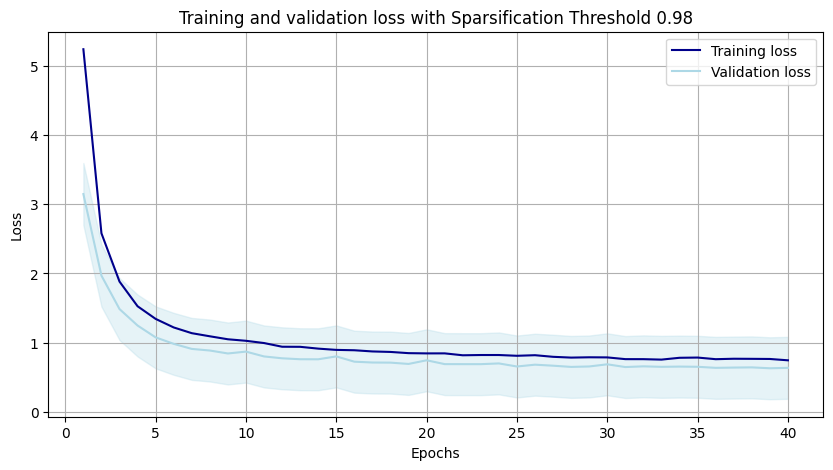

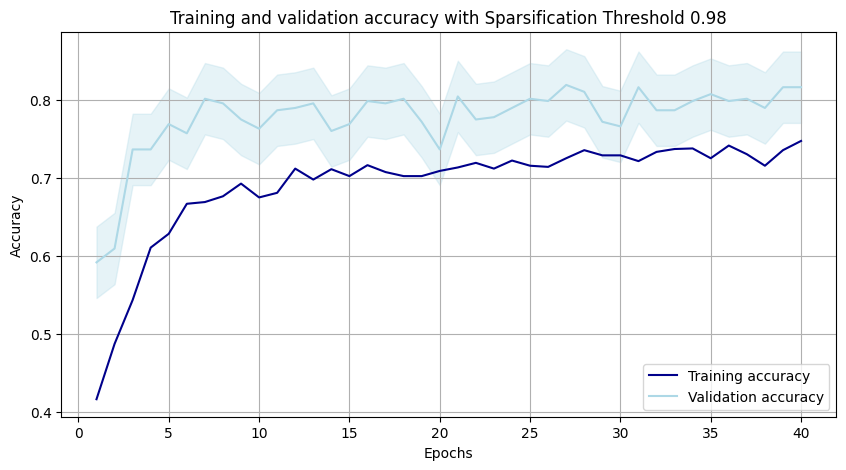

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.2019 - loss: 2.5307
Epoch 2/40


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2202 - loss: 2.3384
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2427 - loss: 2.1217
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2499 - loss: 2.0435
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.2765 - loss: 1.9117
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3126 - loss: 1.8550
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3197 - loss: 1.8036
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.3043 - loss: 1.7991
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3256 - loss: 1.7364
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3351 - loss: 1.7482
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3475 - loss: 1.6938
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.3529 - loss: 1.7221
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.3552 - loss: 1.6732
Epoch 14/40
1/1 ━━━━━

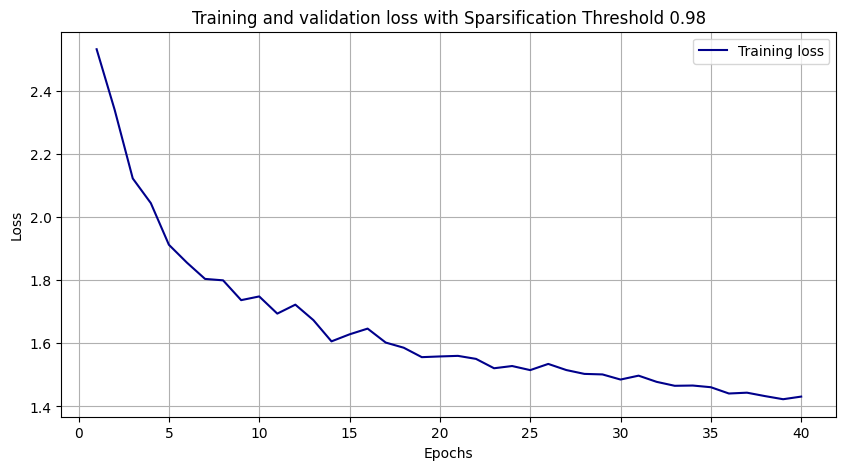

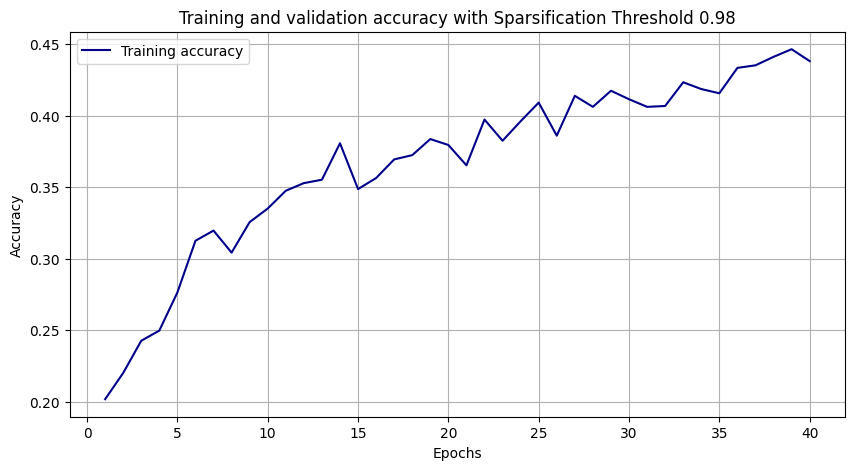

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3185 - loss: 2.8430 - val_accuracy: 0.5710 - val_loss: 1.7073
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4896 - loss: 1.7121 - val_accuracy: 0.5947 - val_loss: 1.3930
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5797 - loss: 1.4275 - val_accuracy: 0.6568 - val_loss: 1.2141
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6440 - loss: 1.2392 - val_accuracy: 0.6391 - val_loss: 1.1354
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6540 - loss: 1.1374 - val_accuracy: 0.6775 - val_loss: 1.0383
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6662 - loss: 1.0820 - val_accuracy: 0.6805 - val_loss: 1.0010
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6782 - loss: 1.0128 - val_accuracy: 0.7071 - val_loss: 0.9470
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6944 - loss: 0.9706 - val_accuracy: 0.7337 - val_loss: 0.9150
Ep

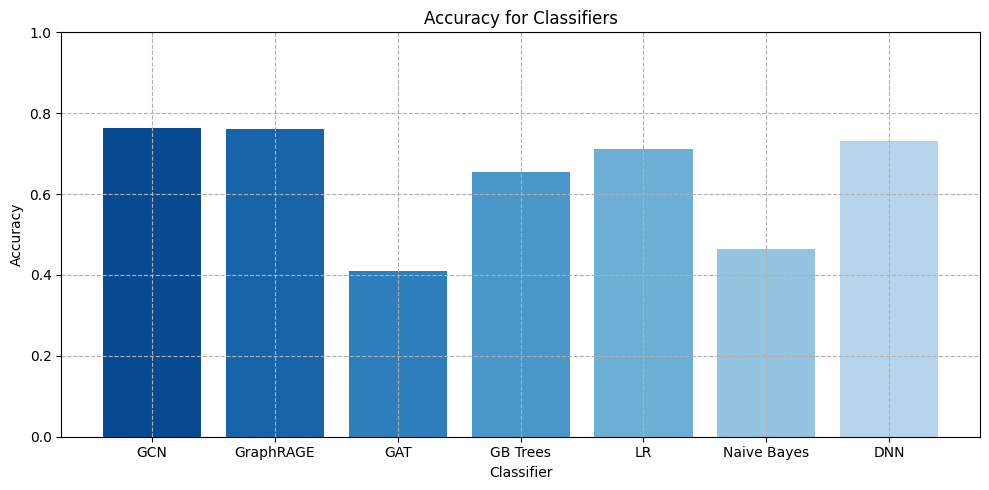

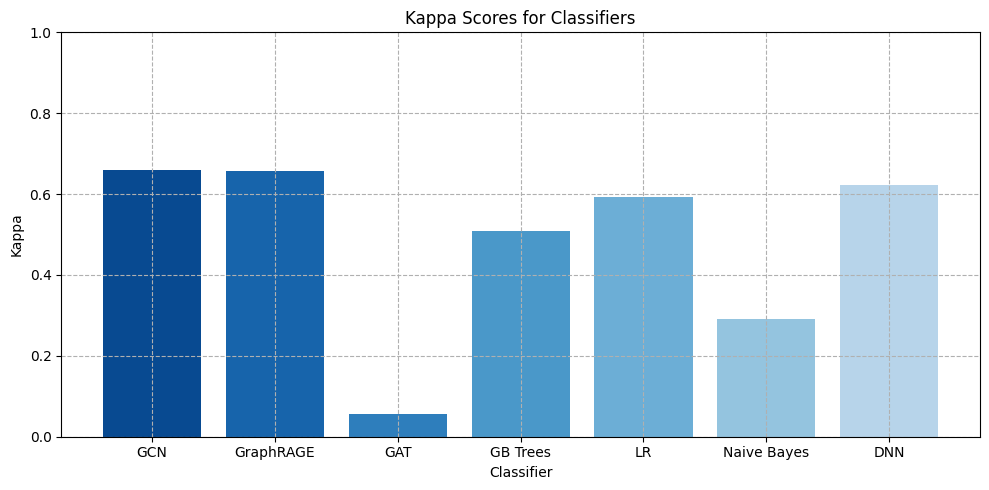

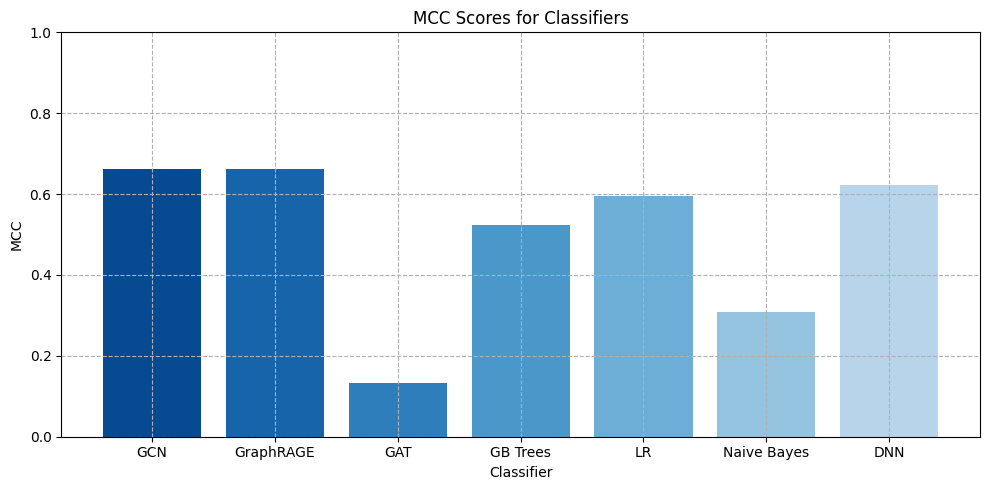

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import seaborn as sns
import random
import tensorflow as tf
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import load_model
import warnings
from rdkit import RDLogger
from tensorflow.keras import models, layers, regularizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

threshold = 0.98

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Suppress RDKit warnings globally
RDLogger.DisableLog('rdApp.*')

def generate_fingerprint(smiles):
    """Generates a molecular fingerprint given a SMILES string."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((1024,), dtype=float)
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024), dtype=float)
    except Exception as e:
        print(f"SMILES Parse Error: {e}")
        return np.zeros((1024,), dtype=float)

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_percentage[i, j]
            annot[i, j] = f'{c}\n({p:.1f}%)'
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(f'Confusion Matrix with Sparsification Threshold {threshold}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def plot_loss_accuracy(history):
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)
    accuracy = history.history['accuracy']
    val_accuracy = history.history.get('val_accuracy', None)
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'darkblue', label='Training loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'lightblue', label='Validation loss')
        plt.fill_between(epochs, np.array(val_loss) - np.std(val_loss), np.array(val_loss) + np.std(val_loss), color='lightblue', alpha=0.3)
    plt.title(f'Training and validation loss with Sparsification Threshold {threshold}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, 'darkblue', label='Training accuracy')
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'lightblue', label='Validation accuracy')
        plt.fill_between(epochs, np.array(val_accuracy) - np.std(val_accuracy), np.array(val_accuracy) + np.std(val_accuracy), color='lightblue', alpha=0.3)
    plt.title(f'Training and validation accuracy with Sparsification Threshold {threshold}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def label_encode_metal_names(metal_names):
    """Encodes metal names as integers."""
    metal_dict = {metal: idx for idx, metal in enumerate(np.unique(metal_names))}
    return np.array([metal_dict[metal] for metal in metal_names])

def preprocess_graph(graph, features):
    feature_dimension = features.shape[1]
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()
    feature_vectors = []
    node_to_index = {node: index for index, node in enumerate(graph.nodes())}
    for node in graph.nodes():
        node_index = node_to_index[node]
        if node_index < len(features):
            feature_vectors.append(features[node_index])
        else:
            feature_vectors.append(np.zeros((feature_dimension,)))
    feature_matrix = np.array(feature_vectors)
    return adjacency_matrix, feature_matrix

# Function to pad matrices to a target size
def pad_matrix(matrix, target_shape, pad_value=0):
    current_shape = matrix.shape
    if current_shape == target_shape:
        return matrix
    padded_matrix = np.full(target_shape, pad_value, dtype=matrix.dtype)
    padded_matrix[:current_shape[0], :current_shape[1]] = matrix
    return padded_matrix

# GCN Model
def build_gcn_model(input_shape_feature, input_shape_adjacency, num_classes):
    x_inp_feature = Input(shape=(input_shape_feature,))
    x_inp_adjacency = Input(shape=(input_shape_adjacency,))
    x_feature = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_feature)
    x_feature = Dropout(0.5)(x_feature)
    x_feature = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_feature)
    x_feature = Dropout(0.3)(x_feature)
    x_adjacency = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_adjacency)
    x_adjacency = Dropout(0.5)(x_adjacency)
    x_adjacency = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_adjacency)
    x_adjacency = Dropout(0.3)(x_adjacency)
    x = concatenate([x_feature, x_adjacency])
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)
    optimizer = Adam(learning_rate=0.0009)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# GraphRAGE Model
def build_graphrage_model(input_shape_feature, input_shape_adjacency, num_classes):
    x_inp_feature = Input(shape=(input_shape_feature,))
    x_inp_adjacency = Input(shape=(input_shape_adjacency,))
    x_feature = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_feature)
    x_feature = Dropout(0.5)(x_feature)
    x_feature = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_feature)
    x_feature = Dropout(0.3)(x_feature)
    x_adjacency = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_adjacency)
    x_adjacency = Dropout(0.5)(x_adjacency)
    x_adjacency = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_adjacency)
    x_adjacency = Dropout(0.3)(x_adjacency)
    x = concatenate([x_feature, x_adjacency])
    x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)
    optimizer = Adam(learning_rate=0.0009)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# GAT Model with Custom Graph Attention Layer
class GraphAttentionLayer(Layer):
    def __init__(self, output_dim, num_nodes, **kwargs):
        self.output_dim = output_dim
        self.num_nodes = num_nodes
        super(GraphAttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[0][-1], self.output_dim),
                                      initializer='glorot_uniform',
                                      trainable=True)
        self.attention_kernel = self.add_weight(name='attention_kernel',
                                                shape=(2 * self.output_dim, 1),
                                                initializer='glorot_uniform',
                                                trainable=True)
        super(GraphAttentionLayer, self).build(input_shape)

    def call(self, inputs):
        features, adj = inputs  # features: (batch_size, num_nodes, feature_dim), adj: (batch_size, num_nodes, num_nodes)

        # Linear transformation of features
        Wh = tf.matmul(features, self.kernel)  # (batch_size, num_nodes, output_dim)

        # Compute attention coefficients
        # Expand dimensions to (batch_size, num_nodes, 1, output_dim) and (batch_size, 1, num_nodes, output_dim)
        Wh1 = tf.expand_dims(Wh, axis=2)  # (batch_size, num_nodes, 1, output_dim)
        Wh2 = tf.expand_dims(Wh, axis=1)  # (batch_size, 1, num_nodes, output_dim)

        # Tile to match shapes for concatenation
        Wh1 = tf.tile(Wh1, [1, 1, self.num_nodes, 1])  # (batch_size, num_nodes, num_nodes, output_dim)
        Wh2 = tf.tile(Wh2, [1, self.num_nodes, 1, 1])  # (batch_size, num_nodes, num_nodes, output_dim)

        # Concatenate along the last axis
        Wh_concat = tf.concat([Wh1, Wh2], axis=-1)  # (batch_size, num_nodes, num_nodes, 2*output_dim)

        # Compute attention scores
        e = tf.matmul(Wh_concat, self.attention_kernel)  # (batch_size, num_nodes, num_nodes, 1)
        e = tf.squeeze(e, axis=-1)  # (batch_size, num_nodes, num_nodes)
        e = tf.keras.layers.LeakyReLU(negative_slope=0.2)(e)

        # Apply mask to attention coefficients using adjacency matrix
        zero_vec = -9e15 * tf.ones_like(e)
        attention = tf.where(adj > 0, e, zero_vec)
        attention = tf.nn.softmax(attention, axis=-1)

        # Apply attention to features
        h = tf.matmul(attention, Wh)  # (batch_size, num_nodes, output_dim)
        return h

    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], self.num_nodes, self.output_dim)

def build_gat_model(input_shape_feature, input_shape_adjacency, num_classes):
    num_nodes = input_shape_adjacency
    x_inp_feature = Input(shape=(num_nodes, input_shape_feature), name='features')
    x_inp_adjacency = Input(shape=(num_nodes, num_nodes), name='adjacency')
    x_feature = x_inp_feature
    x_adjacency = x_inp_adjacency
    gat_output = GraphAttentionLayer(64, num_nodes)([x_feature, x_adjacency])
    gat_output = Dropout(0.5)(gat_output)
    gat_output = GraphAttentionLayer(32, num_nodes)([gat_output, x_adjacency])
    gat_output = Dropout(0.3)(gat_output)
    # Remove GlobalAveragePooling1D to retain per-node features
    x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(gat_output)  # (batch_size, num_nodes, 16)
    output = Dense(num_classes, activation='softmax')(x)  # (batch_size, num_nodes, num_classes)
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)
    optimizer = Adam(learning_rate=0.0009)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

def build_feedforward_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_gnn_model(model, adjacency_matrix, feature_matrix, labels, epochs, batch_size, model_name, num_nodes=None):
    if model is not None and adjacency_matrix is not None and feature_matrix is not None and labels is not None:
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(f'best_{model_name}_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

        # Set validation split based on model type
        validation_split = 0.2 if model_name != 'gat' else 0.0  # Disable validation split for GAT

        if model_name == 'gat':
            if num_nodes is None:
                num_nodes = adjacency_matrix.shape[0]
            num_samples = feature_matrix.shape[0] // num_nodes
            feature_dim = feature_matrix.shape[1]
            feature_matrix = feature_matrix.reshape(num_samples, num_nodes, feature_dim)
            adjacency_matrix = adjacency_matrix.reshape(num_samples, num_nodes, num_nodes)
            labels = labels.reshape(num_samples, num_nodes, -1)  # Reshape labels to (batch_size, num_nodes, num_classes)

        start_time = time.time()
        history = model.fit([feature_matrix, adjacency_matrix], labels,
                            epochs=epochs, batch_size=batch_size,
                            validation_split=validation_split, callbacks=[early_stopping, model_checkpoint])
        end_time = time.time()
        total_training_time = end_time - start_time
        print(f"Total training time for {model_name}: {total_training_time:.2f} seconds")
        return history
    else:
        print(f"Error: One or more input arguments to train {model_name} model is None.")
        return None

if __name__ == "__main__":
    edges_list_filename = 'sparsified_graph_edges_0.98.csv'
    summary_data_filename = '1M1L3D_summary.csv'

    edges_list = pd.read_csv(edges_list_filename, header=None, names=['source', 'target', 'weight'], delimiter=' ')
    summary_data = pd.read_csv(summary_data_filename)

    node_labels_source = edges_list['source'].astype(str).unique()
    node_labels_target = edges_list['target'].astype(str).unique()
    node_labels = np.unique(np.concatenate((node_labels_source, node_labels_target)))
    node_labels = list(set(node_labels))

    print("Unique node labels:", len(node_labels))

    summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
    print("Filtered summary data:\n", len(summary_data_filtered))

    if not summary_data_filtered.empty:
        linker_smiles = summary_data_filtered['linker SMILES']
        if not linker_smiles.empty:
            linker_features = np.stack(linker_smiles.dropna().apply(generate_fingerprint).values)
            metal_names = summary_data_filtered['metal']
            metal_features = label_encode_metal_names(metal_names).reshape(-1, 1)
            other_features = summary_data_filtered[['Largest Cavity Diameter', 'Largest Free Sphere']].values.astype('float32')
            features = np.concatenate((linker_features, metal_features, other_features), axis=1)

            summary_data_filtered['PLD_category'] = pd.cut(
                summary_data_filtered['Pore Limiting Diameter'],
                bins=[-np.inf, 2.4, 4.4, 5.9, np.inf],
                labels=['nonporous', 'small pore', 'medium pore', 'large pore']
            )
            labels = pd.get_dummies(summary_data_filtered['PLD_category']).values

            indices = np.arange(len(features))
            train_indices, test_indices, y_train, y_test = train_test_split(indices, labels, test_size=0.2, random_state=56)

            graph = nx.read_weighted_edgelist(edges_list_filename)
            adjacency_matrix, feature_matrix = preprocess_graph(graph, features)

            adj_train = adjacency_matrix[train_indices][:, train_indices]
            adj_test = adjacency_matrix[test_indices][:, test_indices]
            feat_train = feature_matrix[train_indices]
            feat_test = feature_matrix[test_indices]

            num_classes = labels.shape[1]

            # Build and train GCN model
            gcn_model = build_gcn_model(feat_train.shape[1], adj_train.shape[1], num_classes)
            gcn_history = train_gnn_model(gcn_model, adj_train, feat_train, y_train, epochs=40, batch_size=32, model_name='gcn')
            if gcn_history:
                plot_loss_accuracy(gcn_history)
            gcn_model.save("gcn_model_0.98.h5")
            np.save("adjacency_matrix_0.98.npy", adjacency_matrix)

            # Pad the test data to match the training size
            target_num_nodes = adj_train.shape[0]  # 1689
            adj_test_padded = pad_matrix(adj_test, (target_num_nodes, target_num_nodes))
            feat_test_padded = pad_matrix(feat_test, (target_num_nodes, feat_test.shape[1]))

            # Evaluate GCN on the actual test samples (first 423 samples)
            num_test_samples = feat_test.shape[0]  # 423
            feat_test_padded_gcn = feat_test_padded[:num_test_samples]
            adj_test_padded_gcn = adj_test_padded[:num_test_samples]
            test_loss, test_accuracy = gcn_model.evaluate([feat_test_padded_gcn, adj_test_padded_gcn], y_test, verbose=0)
            print(f'GCN Test Accuracy: {test_accuracy}')
            best_gcn_model = load_model('best_gcn_model.keras')
            test_loss, test_accuracy = best_gcn_model.evaluate([feat_test_padded_gcn, adj_test_padded_gcn], y_test, verbose=0)
            print(f'GCN Test Accuracy of the best model: {test_accuracy}')
            y_pred_gcn = np.argmax(gcn_model.predict([feat_test_padded_gcn, adj_test_padded_gcn]), axis=1)
            y_true_gcn = np.argmax(y_test, axis=1)
            classes = ['nonporous', 'small pore', 'medium pore', 'large pore']
            plot_confusion_matrix(y_true_gcn, y_pred_gcn, classes)
            gcn_accuracy = accuracy_score(y_true_gcn, y_pred_gcn)
            gcn_kappa = cohen_kappa_score(y_true_gcn, y_pred_gcn)
            gcn_mcc = matthews_corrcoef(y_true_gcn, y_pred_gcn)

            # Build and train GraphRAGE model
            graphrage_model = build_graphrage_model(feat_train.shape[1], adj_train.shape[1], num_classes)
            graphrage_history = train_gnn_model(graphrage_model, adj_train, feat_train, y_train, epochs=40, batch_size=32, model_name='graphrage')
            if graphrage_history:
                plot_loss_accuracy(graphrage_history)
            graphrage_model.save("graphrage_model_0.98.h5")
            y_pred_graphrage = np.argmax(graphrage_model.predict([feat_test_padded_gcn, adj_test_padded_gcn]), axis=1)
            y_true_graphrage = np.argmax(y_test, axis=1)
            graphrage_accuracy = accuracy_score(y_true_graphrage, y_pred_graphrage)
            graphrage_kappa = cohen_kappa_score(y_true_graphrage, y_pred_graphrage)
            graphrage_mcc = matthews_corrcoef(y_true_graphrage, y_pred_graphrage)

            # Build and train GAT model
            gat_model = build_gat_model(feat_train.shape[1], adj_train.shape[1], num_classes)
            gat_history = train_gnn_model(gat_model, adj_train, feat_train, y_train, epochs=40, batch_size=32, model_name='gat', num_nodes=adj_train.shape[0])
            if gat_history:
                plot_loss_accuracy(gat_history)
            gat_model.save("gat_model_0.98.h5")

            # Pad the test data for GAT to match the training size
            feat_test_padded_gat = pad_matrix(feat_test, (target_num_nodes, feat_test.shape[1]))  # (1689, 1027)
            adj_test_padded_gat = pad_matrix(adj_test, (target_num_nodes, target_num_nodes))  # (1689, 1689)

            # Reshape for GAT model
            num_test_samples_gat = 1  # Since GAT processes the entire graph as one sample
            feat_test_reshaped = feat_test_padded_gat.reshape(num_test_samples_gat, target_num_nodes, feat_test.shape[1])  # (1, 1689, 1027)
            adj_test_reshaped = adj_test_padded_gat.reshape(num_test_samples_gat, target_num_nodes, target_num_nodes)  # (1, 1689, 1689)

            # Predict with GAT and take the first 423 predictions (actual test nodes)
            y_pred_gat_full = gat_model.predict([feat_test_reshaped, adj_test_reshaped])  # (1, 1689, num_classes)
            y_pred_gat = np.argmax(y_pred_gat_full[0, :num_test_samples], axis=1)  # (423,)
            y_true_gat = np.argmax(y_test, axis=1)  # (423,)
            gat_accuracy = accuracy_score(y_true_gat, y_pred_gat)
            gat_kappa = cohen_kappa_score(y_true_gat, y_pred_gat)
            gat_mcc = matthews_corrcoef(y_true_gat, y_pred_gat)

            # Train and evaluate other ML models
            train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

            gbt_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=2)
            gbt_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            gbt_pred = gbt_classifier.predict(test_features)
            gbt_accuracy = accuracy_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), gbt_pred)

            from sklearn.linear_model import LogisticRegression
            logreg_classifier = LogisticRegression(max_iter=200)
            logreg_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            logreg_pred = logreg_classifier.predict(test_features)
            logreg_accuracy = accuracy_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), logreg_pred)

            nb_classifier = GaussianNB()
            nb_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            nb_pred = nb_classifier.predict(test_features)
            nb_accuracy = accuracy_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), nb_pred)

            feedforward_model = build_feedforward_model(train_features.shape[1], train_labels.shape[1])
            feedforward_model.fit(train_features, train_labels, epochs=20, batch_size=32, validation_split=0.2)
            feedforward_loss, feedforward_accuracy = feedforward_model.evaluate(test_features, test_labels)
            feedforward_predictions = np.argmax(feedforward_model.predict(test_features), axis=1)
            true_labels = np.argmax(test_labels, axis=1)
            dnn_kappa = cohen_kappa_score(true_labels, feedforward_predictions)
            dnn_mcc = matthews_corrcoef(true_labels, feedforward_predictions)

            classifiers = ['GCN', 'GraphRAGE', 'GAT', 'GB Trees', 'LR', 'Naive Bayes', 'DNN']
            accuracies = [gcn_accuracy, graphrage_accuracy, gat_accuracy, gbt_accuracy, logreg_accuracy, nb_accuracy, feedforward_accuracy]
            kappa_scores = [gcn_kappa, graphrage_kappa, gat_kappa, gbt_kappa, logreg_kappa, nb_kappa, dnn_kappa]
            mcc_scores = [gcn_mcc, graphrage_mcc, gat_mcc, gbt_mcc, logreg_mcc, nb_mcc, dnn_mcc]

            print("Classifier Evaluation Metrics:")
            for clf, acc, kappa, mcc in zip(classifiers, accuracies, kappa_scores, mcc_scores):
                print(f"{clf}: Accuracy={acc:.3f}, Kappa={kappa:.3f}, MCC={mcc:.3f}")

            colors = plt.cm.Blues(np.linspace(0.9, 0.3, len(classifiers)))

            plt.figure(figsize=(10, 5))
            plt.bar(classifiers, accuracies, color=colors)
            plt.title('Accuracy for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('Accuracy')
            plt.ylim(0, 1)
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.bar(classifiers, kappa_scores, color=colors)
            plt.title('Kappa Scores for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('Kappa')
            plt.ylim(0, 1)
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.bar(classifiers, mcc_scores, color=colors)
            plt.title('MCC Scores for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('MCC')
            plt.ylim(0, 1)
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()

        else:
            print("Error: linker_smiles column is empty.")
    else:
        print("Error: summary_data_filtered DataFrame is empty.")

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import seaborn as sns
import random
import tensorflow as tf
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import load_model
import warnings
from rdkit import RDLogger
from tensorflow.keras import models, layers, regularizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

# Define thresholds to evaluate
thresholds = [0.98, 0.95, 0.9]

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Suppress RDKit warnings globally
RDLogger.DisableLog('rdApp.*')

def generate_fingerprint(smiles):
    """Generates a molecular fingerprint given a SMILES string."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((1024,), dtype=float)
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024), dtype=float)
    except Exception as e:
        print(f"SMILES Parse Error: {e}")
        return np.zeros((1024,), dtype=float)

def plot_confusion_matrix(y_true, y_pred, classes, threshold):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_percentage[i, j]
            annot[i, j] = f'{c}\n({p:.1f}%)'
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(f'Confusion Matrix with Sparsification Threshold {threshold}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def plot_loss_accuracy(history, threshold):
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)
    accuracy = history.history['accuracy']
    val_accuracy = history.history.get('val_accuracy', None)
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'darkblue', label='Training loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'lightblue', label='Validation loss')
        plt.fill_between(epochs, np.array(val_loss) - np.std(val_loss), np.array(val_loss) + np.std(val_loss), color='lightblue', alpha=0.3)
    plt.title(f'Training and validation loss with Sparsification Threshold {threshold}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, 'darkblue', label='Training accuracy')
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'lightblue', label='Validation accuracy')
        plt.fill_between(epochs, np.array(val_accuracy) - np.std(val_accuracy), np.array(val_accuracy) + np.std(val_accuracy), color='lightblue', alpha=0.3)
    plt.title(f'Training and validation accuracy with Sparsification Threshold {threshold}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def label_encode_metal_names(metal_names):
    """Encodes metal names as integers."""
    metal_dict = {metal: idx for idx, metal in enumerate(np.unique(metal_names))}
    return np.array([metal_dict[metal] for metal in metal_names])

def preprocess_graph(graph, features):
    feature_dimension = features.shape[1]
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()
    feature_vectors = []
    node_to_index = {node: index for index, node in enumerate(graph.nodes())}
    for node in graph.nodes():
        node_index = node_to_index[node]
        if node_index < len(features):
            feature_vectors.append(features[node_index])
        else:
            feature_vectors.append(np.zeros((feature_dimension,)))
    feature_matrix = np.array(feature_vectors)
    return adjacency_matrix, feature_matrix

# Function to pad matrices to a target size
def pad_matrix(matrix, target_shape, pad_value=0):
    current_shape = matrix.shape
    if current_shape == target_shape:
        return matrix
    padded_matrix = np.full(target_shape, pad_value, dtype=matrix.dtype)
    padded_matrix[:current_shape[0], :current_shape[1]] = matrix
    return padded_matrix

# GCN Model
def build_gcn_model(input_shape_feature, input_shape_adjacency, num_classes):
    x_inp_feature = Input(shape=(input_shape_feature,))
    x_inp_adjacency = Input(shape=(input_shape_adjacency,))
    x_feature = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_feature)
    x_feature = Dropout(0.5)(x_feature)
    x_feature = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_feature)
    x_feature = Dropout(0.3)(x_feature)
    x_adjacency = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_adjacency)
    x_adjacency = Dropout(0.5)(x_adjacency)
    x_adjacency = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_adjacency)
    x_adjacency = Dropout(0.3)(x_adjacency)
    x = concatenate([x_feature, x_adjacency])
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)
    optimizer = Adam(learning_rate=0.0009)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# GraphRAGE Model
def build_graphrage_model(input_shape_feature, input_shape_adjacency, num_classes):
    x_inp_feature = Input(shape=(input_shape_feature,))
    x_inp_adjacency = Input(shape=(input_shape_adjacency,))
    x_feature = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_feature)
    x_feature = Dropout(0.5)(x_feature)
    x_feature = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_feature)
    x_feature = Dropout(0.3)(x_feature)
    x_adjacency = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_adjacency)
    x_adjacency = Dropout(0.5)(x_adjacency)
    x_adjacency = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_adjacency)
    x_adjacency = Dropout(0.3)(x_adjacency)
    x = concatenate([x_feature, x_adjacency])
    x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)
    optimizer = Adam(learning_rate=0.0009)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# GAT Model with Custom Graph Attention Layer
class GraphAttentionLayer(Layer):
    def __init__(self, output_dim, num_nodes, **kwargs):
        self.output_dim = output_dim
        self.num_nodes = num_nodes
        super(GraphAttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[0][-1], self.output_dim),
                                      initializer='glorot_uniform',
                                      trainable=True)
        self.attention_kernel = self.add_weight(name='attention_kernel',
                                                shape=(2 * self.output_dim, 1),
                                                initializer='glorot_uniform',
                                                trainable=True)
        super(GraphAttentionLayer, self).build(input_shape)

    def call(self, inputs):
        features, adj = inputs  # features: (batch_size, num_nodes, feature_dim), adj: (batch_size, num_nodes, num_nodes)

        # Linear transformation of features
        Wh = tf.matmul(features, self.kernel)  # (batch_size, num_nodes, output_dim)

        # Compute attention coefficients
        Wh1 = tf.expand_dims(Wh, axis=2)  # (batch_size, num_nodes, 1, output_dim)
        Wh2 = tf.expand_dims(Wh, axis=1)  # (batch_size, 1, num_nodes, output_dim)
        Wh1 = tf.tile(Wh1, [1, 1, self.num_nodes, 1])  # (batch_size, num_nodes, num_nodes, output_dim)
        Wh2 = tf.tile(Wh2, [1, self.num_nodes, 1, 1])  # (batch_size, num_nodes, num_nodes, output_dim)
        Wh_concat = tf.concat([Wh1, Wh2], axis=-1)  # (batch_size, num_nodes, num_nodes, 2*output_dim)

        # Compute attention scores
        e = tf.matmul(Wh_concat, self.attention_kernel)  # (batch_size, num_nodes, num_nodes, 1)
        e = tf.squeeze(e, axis=-1)  # (batch_size, num_nodes, num_nodes)
        e = tf.keras.layers.LeakyReLU(negative_slope=0.2)(e)

        # Apply mask to attention coefficients using adjacency matrix
        zero_vec = -9e15 * tf.ones_like(e)
        attention = tf.where(adj > 0, e, zero_vec)
        attention = tf.nn.softmax(attention, axis=-1)

        # Apply attention to features
        h = tf.matmul(attention, Wh)  # (batch_size, num_nodes, output_dim)
        return h

    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], self.num_nodes, self.output_dim)

def build_gat_model(input_shape_feature, input_shape_adjacency, num_classes):
    num_nodes = input_shape_adjacency
    x_inp_feature = Input(shape=(num_nodes, input_shape_feature), name='features')
    x_inp_adjacency = Input(shape=(num_nodes, num_nodes), name='adjacency')
    x_feature = x_inp_feature
    x_adjacency = x_inp_adjacency
    gat_output = GraphAttentionLayer(64, num_nodes)([x_feature, x_adjacency])
    gat_output = Dropout(0.5)(gat_output)
    gat_output = GraphAttentionLayer(32, num_nodes)([gat_output, x_adjacency])
    gat_output = Dropout(0.3)(gat_output)
    x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(gat_output)  # (batch_size, num_nodes, 16)
    output = Dense(num_classes, activation='softmax')(x)  # (batch_size, num_nodes, num_classes)
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)
    optimizer = Adam(learning_rate=0.0009)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

def build_feedforward_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_gnn_model(model, adjacency_matrix, feature_matrix, labels, epochs, batch_size, model_name, num_nodes=None):
    if model is not None and adjacency_matrix is not None and feature_matrix is not None and labels is not None:
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(f'best_{model_name}_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

        validation_split = 0.2 if model_name != 'gat' else 0.0

        if model_name == 'gat':
            if num_nodes is None:
                num_nodes = adjacency_matrix.shape[0]
            num_samples = feature_matrix.shape[0] // num_nodes
            feature_dim = feature_matrix.shape[1]
            feature_matrix = feature_matrix.reshape(num_samples, num_nodes, feature_dim)
            adjacency_matrix = adjacency_matrix.reshape(num_samples, num_nodes, num_nodes)
            labels = labels.reshape(num_samples, num_nodes, -1)

        start_time = time.time()
        history = model.fit([feature_matrix, adjacency_matrix], labels,
                            epochs=epochs, batch_size=batch_size,
                            validation_split=validation_split, callbacks=[early_stopping, model_checkpoint])
        end_time = time.time()
        total_training_time = end_time - start_time
        print(f"Total training time for {model_name}: {total_training_time:.2f} seconds")
        return history
    else:
        print(f"Error: One or more input arguments to train {model_name} model is None.")
        return None

if __name__ == "__main__":
    summary_data_filename = '1M1L3D_summary.csv'
    summary_data = pd.read_csv(summary_data_filename)

    # Dictionary to store results for each threshold
    results = {threshold: {'accuracies': [], 'kappa_scores': [], 'mcc_scores': []} for threshold in thresholds}
    classifiers = ['GCN', 'GraphRAGE', 'GAT', 'GB Trees', 'LR', 'Naive Bayes', 'DNN']

    for threshold in thresholds:
        print(f"\nProcessing threshold: {threshold}")
        edges_list_filename = f'sparsified_graph_edges_{threshold}.csv'

        edges_list = pd.read_csv(edges_list_filename, header=None, names=['source', 'target', 'weight'], delimiter=' ')

        node_labels_source = edges_list['source'].astype(str).unique()
        node_labels_target = edges_list['target'].astype(str).unique()
        node_labels = np.unique(np.concatenate((node_labels_source, node_labels_target)))
        node_labels = list(set(node_labels))

        print("Unique node labels:", len(node_labels))

        summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
        print("Filtered summary data:", len(summary_data_filtered))

        if not summary_data_filtered.empty:
            linker_smiles = summary_data_filtered['linker SMILES']
            if not linker_smiles.empty:
                linker_features = np.stack(linker_smiles.dropna().apply(generate_fingerprint).values)
                metal_names = summary_data_filtered['metal']
                metal_features = label_encode_metal_names(metal_names).reshape(-1, 1)
                other_features = summary_data_filtered[['Largest Cavity Diameter', 'Largest Free Sphere']].values.astype('float32')
                features = np.concatenate((linker_features, metal_features, other_features), axis=1)

                summary_data_filtered['PLD_category'] = pd.cut(
                    summary_data_filtered['Pore Limiting Diameter'],
                    bins=[-np.inf, 2.4, 4.4, 5.9, np.inf],
                    labels=['nonporous', 'small pore', 'medium pore', 'large pore']
                )
                labels = pd.get_dummies(summary_data_filtered['PLD_category']).values

                indices = np.arange(len(features))
                train_indices, test_indices, y_train, y_test = train_test_split(indices, labels, test_size=0.2, random_state=56)

                graph = nx.read_weighted_edgelist(edges_list_filename)
                adjacency_matrix, feature_matrix = preprocess_graph(graph, features)

                adj_train = adjacency_matrix[train_indices][:, train_indices]
                adj_test = adjacency_matrix[test_indices][:, test_indices]
                feat_train = feature_matrix[train_indices]
                feat_test = feature_matrix[test_indices]

                num_classes = labels.shape[1]

                # Build and train GCN model
                gcn_model = build_gcn_model(feat_train.shape[1], adj_train.shape[1], num_classes)
                gcn_history = train_gnn_model(gcn_model, adj_train, feat_train, y_train, epochs=40, batch_size=32, model_name='gcn')
                if gcn_history:
                    plot_loss_accuracy(gcn_history, threshold)
                gcn_model.save(f"gcn_model_{threshold}.h5")
                np.save(f"adjacency_matrix_{threshold}.npy", adjacency_matrix)

                # Pad the test data to match the training size
                target_num_nodes = adj_train.shape[0]
                adj_test_padded = pad_matrix(adj_test, (target_num_nodes, target_num_nodes))
                feat_test_padded = pad_matrix(feat_test, (target_num_nodes, feat_test.shape[1]))

                # Evaluate GCN
                num_test_samples = feat_test.shape[0]
                feat_test_padded_gcn = feat_test_padded[:num_test_samples]
                adj_test_padded_gcn = adj_test_padded[:num_test_samples]
                test_loss, test_accuracy = gcn_model.evaluate([feat_test_padded_gcn, adj_test_padded_gcn], y_test, verbose=0)
                print(f'GCN Test Accuracy (Threshold {threshold}): {test_accuracy}')
                best_gcn_model = load_model(f'best_gcn_model.keras')
                test_loss, test_accuracy = best_gcn_model.evaluate([feat_test_padded_gcn, adj_test_padded_gcn], y_test, verbose=0)
                print(f'GCN Test Accuracy of the best model (Threshold {threshold}): {test_accuracy}')
                y_pred_gcn = np.argmax(gcn_model.predict([feat_test_padded_gcn, adj_test_padded_gcn]), axis=1)
                y_true_gcn = np.argmax(y_test, axis=1)
                classes = ['nonporous', 'small pore', 'medium pore', 'large pore']
                plot_confusion_matrix(y_true_gcn, y_pred_gcn, classes, threshold)
                gcn_accuracy = accuracy_score(y_true_gcn, y_pred_gcn)
                gcn_kappa = cohen_kappa_score(y_true_gcn, y_pred_gcn)
                gcn_mcc = matthews_corrcoef(y_true_gcn, y_pred_gcn)

                # Build and train GraphRAGE model
                graphrage_model = build_graphrage_model(feat_train.shape[1], adj_train.shape[1], num_classes)
                graphrage_history = train_gnn_model(graphrage_model, adj_train, feat_train, y_train, epochs=40, batch_size=32, model_name='graphrage')
                if graphrage_history:
                    plot_loss_accuracy(graphrage_history, threshold)
                graphrage_model.save(f"graphrage_model_{threshold}.h5")
                y_pred_graphrage = np.argmax(graphrage_model.predict([feat_test_padded_gcn, adj_test_padded_gcn]), axis=1)
                y_true_graphrage = np.argmax(y_test, axis=1)
                graphrage_accuracy = accuracy_score(y_true_graphrage, y_pred_graphrage)
                graphrage_kappa = cohen_kappa_score(y_true_graphrage, y_pred_graphrage)
                graphrage_mcc = matthews_corrcoef(y_true_graphrage, y_pred_graphrage)

                # Build and train GAT model
                gat_model = build_gat_model(feat_train.shape[1], adj_train.shape[1], num_classes)
                gat_history = train_gnn_model(gat_model, adj_train, feat_train, y_train, epochs=40, batch_size=32, model_name='gat', num_nodes=adj_train.shape[0])
                if gat_history:
                    plot_loss_accuracy(gat_history, threshold)
                gat_model.save(f"gat_model_{threshold}.h5")

                # Pad the test data for GAT
                feat_test_padded_gat = pad_matrix(feat_test, (target_num_nodes, feat_test.shape[1]))
                adj_test_padded_gat = pad_matrix(adj_test, (target_num_nodes, target_num_nodes))

                # Reshape for GAT model
                num_test_samples_gat = 1
                feat_test_reshaped = feat_test_padded_gat.reshape(num_test_samples_gat, target_num_nodes, feat_test.shape[1])
                adj_test_reshaped = adj_test_padded_gat.reshape(num_test_samples_gat, target_num_nodes, target_num_nodes)

                # Predict with GAT
                y_pred_gat_full = gat_model.predict([feat_test_reshaped, adj_test_reshaped])
                y_pred_gat = np.argmax(y_pred_gat_full[0, :num_test_samples], axis=1)
                y_true_gat = np.argmax(y_test, axis=1)
                gat_accuracy = accuracy_score(y_true_gat, y_pred_gat)
                gat_kappa = cohen_kappa_score(y_true_gat, y_pred_gat)
                gat_mcc = matthews_corrcoef(y_true_gat, y_pred_gat)

                # Train and evaluate other ML models
                train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

                gbt_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=2)
                gbt_classifier.fit(train_features, np.argmax(train_labels, axis=1))
                gbt_pred = gbt_classifier.predict(test_features)
                gbt_accuracy = accuracy_score(np.argmax(test_labels, axis=1), gbt_pred)
                gbt_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), gbt_pred)
                gbt_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), gbt_pred)

                from sklearn.linear_model import LogisticRegression
                logreg_classifier = LogisticRegression(max_iter=200)
                logreg_classifier.fit(train_features, np.argmax(train_labels, axis=1))
                logreg_pred = logreg_classifier.predict(test_features)
                logreg_accuracy = accuracy_score(np.argmax(test_labels, axis=1), logreg_pred)
                logreg_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), logreg_pred)
                logreg_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), logreg_pred)

                nb_classifier = GaussianNB()
                nb_classifier.fit(train_features, np.argmax(train_labels, axis=1))
                nb_pred = nb_classifier.predict(test_features)
                nb_accuracy = accuracy_score(np.argmax(test_labels, axis=1), nb_pred)
                nb_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), nb_pred)
                nb_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), nb_pred)

                feedforward_model = build_feedforward_model(train_features.shape[1], train_labels.shape[1])
                feedforward_model.fit(train_features, train_labels, epochs=20, batch_size=32, validation_split=0.2)
                feedforward_loss, feedforward_accuracy = feedforward_model.evaluate(test_features, test_labels)
                feedforward_predictions = np.argmax(feedforward_model.predict(test_features), axis=1)
                true_labels = np.argmax(test_labels, axis=1)
                dnn_kappa = cohen_kappa_score(true_labels, feedforward_predictions)
                dnn_mcc = matthews_corrcoef(true_labels, feedforward_predictions)

                # Store results
                accuracies = [gcn_accuracy, graphrage_accuracy, gat_accuracy, gbt_accuracy, logreg_accuracy, nb_accuracy, feedforward_accuracy]
                kappa_scores = [gcn_kappa, graphrage_kappa, gat_kappa, gbt_kappa, logreg_kappa, nb_kappa, dnn_kappa]
                mcc_scores = [gcn_mcc, graphrage_mcc, gat_mcc, gbt_mcc, logreg_mcc, nb_mcc, dnn_mcc]

                results[threshold]['accuracies'] = accuracies
                results[threshold]['kappa_scores'] = kappa_scores
                results[threshold]['mcc_scores'] = mcc_scores

                print(f"\nClassifier Evaluation Metrics (Threshold {threshold}):")
                for clf, acc, kappa, mcc in zip(classifiers, accuracies, kappa_scores, mcc_scores):
                    print(f"{clf}: Accuracy={acc:.3f}, Kappa={kappa:.3f}, MCC={mcc:.3f}")

            else:
                print("Error: linker_smiles column is empty.")
        else:
            print("Error: summary_data_filtered DataFrame is empty.")

    # Plot comparative results across thresholds
    def plot_comparative_metrics(metric_name, metric_data, classifiers, thresholds):
        x = np.arange(len(classifiers))
        width = 0.25

        fig, ax = plt.subplots(figsize=(12, 6))
        for i, threshold in enumerate(thresholds):
            ax.bar(x + i * width, metric_data[threshold], width, label=f'Threshold {threshold}')

        ax.set_xlabel('Classifier')
        ax.set_ylabel(metric_name)
        ax.set_title(f'{metric_name} Comparison Across Thresholds')
        ax.set_xticks(x + width * (len(thresholds) - 1) / 2)
        ax.set_xticklabels(classifiers)
        ax.legend()
        ax.grid(True, which="both", ls="--")
        plt.tight_layout()
        plt.show()

    # Extract metrics for plotting
    accuracies = {threshold: results[threshold]['accuracies'] for threshold in thresholds}
    kappa_scores = {threshold: results[threshold]['kappa_scores'] for threshold in thresholds}
    mcc_scores = {threshold: results[threshold]['mcc_scores'] for threshold in thresholds}

    # Plot comparative bar charts
    plot_comparative_metrics('Accuracy', accuracies, classifiers, thresholds)
    plot_comparative_metrics('Kappa Score', kappa_scores, classifiers, thresholds)
    plot_comparative_metrics('MCC Score', mcc_scores, classifiers, thresholds)


Processing threshold: 0.98
Unique node labels: 2112
Filtered summary data: 2112


<ipython-input-6-ca5e2aab0327>:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_filtered['PLD_category'] = pd.cut(


Epoch 1/40
38/43 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3122 - loss: 6.3719
Epoch 1: val_loss improved from inf to 2.76181, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.3184 - loss: 6.1804 - val_accuracy: 0.6036 - val_loss: 2.7618
Epoch 2/40
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4686 - loss: 2.5831
Epoch 2: val_loss improved from 2.76181 to 1.72166, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4711 - loss: 2.5535 - val_accuracy: 0.6893 - val_loss: 1.7217
Epoch 3/40
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5463 - loss: 1.7506
Epoch 3: val_loss improved from 1.72166 to 1.35825, saving model to best_gcn_model.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5475 - loss: 1.7451 - val_accuracy: 0.7278 - val_loss: 1.3583
Epoch 4/40
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5610 - loss: 1.4921
Epoch 4: val_loss improved from 1.35825 to 1.1483